In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [2]:
img = io.imread('Images/test2.jpg')

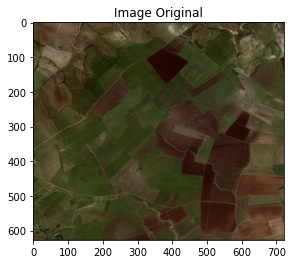

In [3]:
plt.title("Image Original")
plt.imshow(img)
plt.show()

In [4]:
# SVM

from sklearn.svm import SVC

In [5]:
## test 1:
## classes = {'arbres': 0, 'vegetation': 1, 'sable': 2}

## test 2: 2
classes = {'terre fetilisé': 0, 'terre rocheuse': 1 ,'végétation': 2 }

In [6]:
rows, cols, bands = img.shape
n_classes = len(classes)
palette = np.uint8([[255, 0, 0], [0, 0, 255], [0, 255, 0]])

In [7]:
X = img.reshape(rows*cols, bands)

In [8]:
svm_seg = n_classes*np.ones(shape=(rows, cols), dtype=np.int)

In [9]:
## test 1:
'''
svm_seg[180:200, 0:20] = classes['arbres']
svm_seg[0:20, 400:420] = classes['vegetation']
svm_seg[400:420, 380:400] = classes['sable']
'''

## test 2:

svm_seg[100:120, 380:400] = classes['terre fetilisé']
svm_seg[130:150, 290:310] = classes['végétation']
svm_seg[80:100, 40:60] = classes['terre rocheuse']


In [10]:
y = svm_seg.ravel()
train = np.flatnonzero(svm_seg < n_classes)
test = np.flatnonzero(svm_seg == n_classes)

In [11]:
classifier = SVC(gamma='scale' , C=0.00000001)
classifier.fit(X[train], y[train])
y[test] = classifier.predict(X[test])
svm_seg = y.reshape(rows, cols)

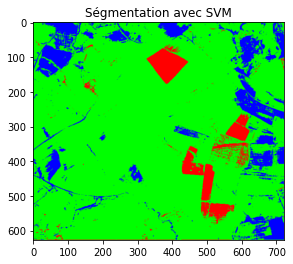

In [12]:
plt.title("Ségmentation avec SVM")
plt.imshow(palette[svm_seg])
plt.show()

In [13]:
# K-Means

from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=n_classes, random_state=2).fit(X)
kmeans_seg = kmeans.labels_.reshape(rows, cols)

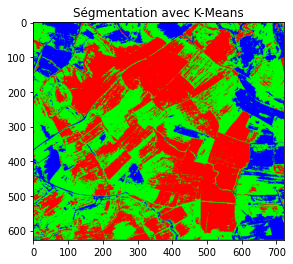

In [15]:
plt.title("Ségmentation avec K-Means")
plt.imshow(palette[kmeans_seg])
plt.show()